In [132]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ottawa-real-estate-data/ottawa-realestate-data.csv


# **Step 1: Import the required libraries**

In [133]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Import Label Encoder and train_test_split, gridsearchcv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

# for min_max scaling
from sklearn.preprocessing import MinMaxScaler

# Import models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

# Import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# **Step 2: Load the data**

In [134]:
data = pd.read_csv('/kaggle/input/ottawa-real-estate-data/ottawa-realestate-data.csv')
df = data.copy()

# **Step 3: Observe the data**

In [135]:
# Observe the 5 rows
df.head()

,latitude,longitude,postalCode,walkScore,propertyType,style,yearBuilt,bedrooms,bathrooms,parking,garage,lotDepth,lotFrontage,price
0,45.442725,-76.048296,K0A 1L0,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,1127.76,1447.80,"2,500,000"
1,45.146541,-75.941510,K0A 1B0,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,1402.08,609.60,"495,000"
2,45.317009,-76.140878,K0A 1L0,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,638.86,470.92,"365,000"
3,46.179294,-74.727161,K4C 1H9,7.0,Commercial,NaN,2020.0,NaN,NaN,0.0,NaN,545.59,411.48,"799,000"
4,45.314785,-75.563076,K1G 3N4,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,983.60,402.17,"9,830,500"


In [136]:
# Number of Rows, Columns
df.shape

(1255, 14)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   latitude      1254 non-null   float64
 1   longitude     1254 non-null   float64
 2   postalCode    1198 non-null   object 
 3   walkScore     1225 non-null   float64
 4   propertyType  1191 non-null   object 
 5   style         1024 non-null   object 
 6   yearBuilt     997 non-null    float64
 7   bedrooms      1040 non-null   float64
 8   bathrooms     1041 non-null   float64
 9   parking       1043 non-null   float64
 10  garage        1015 non-null   float64
 11  lotDepth      700 non-null    float64
 12  lotFrontage   700 non-null    float64
 13  price         1233 non-null   object 
dtypes: float64(10), object(4)
memory usage: 137.4+ KB


In [138]:
df.isnull().sum()

latitude          1
longitude         1
postalCode       57
walkScore        30
propertyType     64
style           231
yearBuilt       258
bedrooms        215
bathrooms       214
parking         212
garage          240
lotDepth        555
lotFrontage     555
price            22
dtype: int64

In [139]:
#Price- Remove Rows containing missing values
df=df[df.price.notnull()]
df.isnull().sum()

latitude          1
longitude         1
postalCode       35
walkScore         8
propertyType     48
style           225
yearBuilt       236
bedrooms        209
bathrooms       208
parking         190
garage          218
lotDepth        533
lotFrontage     533
price             0
dtype: int64

In [140]:
#Latitude and Longitude - Remove Rows containing missing values

df=df[df.latitude.notnull()]
df.isnull().sum()

latitude          0
longitude         0
postalCode       35
walkScore         8
propertyType     48
style           225
yearBuilt       236
bedrooms        209
bathrooms       208
parking         190
garage          218
lotDepth        532
lotFrontage     532
price             0
dtype: int64

In [141]:
# Remove commas from the 'price' column and convert to integer
df['price'] = df['price'].str.replace(',', '').astype(float)

# Check the data types to confirm the conversion
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1232 entries, 0 to 1252
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   latitude      1232 non-null   float64
 1   longitude     1232 non-null   float64
 2   postalCode    1197 non-null   object 
 3   walkScore     1224 non-null   float64
 4   propertyType  1184 non-null   object 
 5   style         1007 non-null   object 
 6   yearBuilt     996 non-null    float64
 7   bedrooms      1023 non-null   float64
 8   bathrooms     1024 non-null   float64
 9   parking       1042 non-null   float64
 10  garage        1014 non-null   float64
 11  lotDepth      700 non-null    float64
 12  lotFrontage   700 non-null    float64
 13  price         1232 non-null   float64
dtypes: float64(11), object(3)
memory usage: 144.4+ KB
None


In [142]:
# Select columns with data type 'object'
columns_to_convert = df.select_dtypes(include=['object']).columns

# Apply the mask to select the columns and convert object columns to categorical 
# to get advantage for memory usage, performance and better semantics.
df[columns_to_convert] = df[columns_to_convert].astype('category')

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1232 entries, 0 to 1252
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   latitude      1232 non-null   float64 
 1   longitude     1232 non-null   float64 
 2   postalCode    1197 non-null   category
 3   walkScore     1224 non-null   float64 
 4   propertyType  1184 non-null   category
 5   style         1007 non-null   category
 6   yearBuilt     996 non-null    float64 
 7   bedrooms      1023 non-null   float64 
 8   bathrooms     1024 non-null   float64 
 9   parking       1042 non-null   float64 
 10  garage        1014 non-null   float64 
 11  lotDepth      700 non-null    float64 
 12  lotFrontage   700 non-null    float64 
 13  price         1232 non-null   float64 
dtypes: category(3), float64(11)
memory usage: 160.2 KB


In [144]:
# Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,1232.0,45.380794,0.109783,44.999742,45.343747,45.395979,45.428192,4.812034e+01
longitude,1232.0,-75.702429,0.149373,-77.971481,-75.744003,-75.693733,-75.651990,-7.472716e+01
walkScore,1224.0,47.619281,31.581542,1.000000,20.000000,47.000000,75.000000,9.800000e+01
yearBuilt,996.0,1988.327309,30.421087,1847.000000,1974.000000,1994.000000,2013.000000,2.022000e+03
bedrooms,1023.0,3.017595,1.379782,0.000000,2.000000,3.000000,4.000000,9.000000e+00
bathrooms,1024.0,2.573242,1.180034,0.000000,2.000000,2.000000,3.000000,7.000000e+00
parking,1042.0,3.465451,5.291254,0.000000,1.000000,2.000000,4.000000,1.000000e+02
garage,1014.0,1.103550,1.148469,0.000000,0.000000,1.000000,2.000000,1.600000e+01
lotDepth,700.0,64.970814,149.931632,5.940000,30.180000,31.970000,42.110000,1.745710e+03
lotFrontage,700.0,30.768500,76.929997,3.310000,10.060000,15.240000,23.945000,1.447800e+03


In [145]:
# Correlation Analysis
df.corr(numeric_only=True).T

,latitude,longitude,walkScore,yearBuilt,bedrooms,bathrooms,parking,garage,lotDepth,lotFrontage,price
latitude,1.000000,-0.109828,0.243900,-0.047144,-0.191172,-0.174548,-0.251377,-0.220421,-0.066346,0.059268,-0.023898
longitude,-0.109828,1.000000,0.049620,-0.004139,0.000823,0.003732,-0.046124,-0.044337,-0.051616,-0.136976,-0.004074
walkScore,0.243900,0.049620,1.000000,0.008000,-0.454533,-0.393587,-0.366036,-0.355427,-0.288313,-0.285886,-0.077503
yearBuilt,-0.047144,-0.004139,0.008000,1.000000,-0.320628,0.001572,-0.104936,0.096846,0.032349,-0.009975,-0.054869
bedrooms,-0.191172,0.000823,-0.454533,-0.320628,1.000000,0.704860,0.347158,0.385798,0.114605,0.150551,0.475956
bathrooms,-0.174548,0.003732,-0.393587,0.001572,0.704860,1.000000,0.281334,0.462119,-0.031747,0.026882,0.592922
parking,-0.251377,-0.046124,-0.366036,-0.104936,0.347158,0.281334,1.000000,0.655324,0.374630,0.388044,0.267861
garage,-0.220421,-0.044337,-0.355427,0.096846,0.385798,0.462119,0.655324,1.000000,0.188564,0.265344,0.448029
lotDepth,-0.066346,-0.051616,-0.288313,0.032349,0.114605,-0.031747,0.374630,0.188564,1.000000,0.742463,0.235433
lotFrontage,0.059268,-0.136976,-0.285886,-0.009975,0.150551,0.026882,0.388044,0.265344,0.742463,1.000000,0.209979


In [146]:
df.corrwith(other=df["price"], numeric_only=True)

latitude      -0.023898
longitude     -0.004074
walkScore     -0.077503
yearBuilt     -0.054869
bedrooms       0.475956
bathrooms      0.592922
parking        0.267861
garage         0.448029
lotDepth       0.235433
lotFrontage    0.209979
price          1.000000
dtype: float64

Here's what we can learn from the result of each correlation coefficient:

Interpretation of Correlation Results

* latitude (-0.023898): There is a very weak negative correlation between latitude and price. This suggests that changes in latitude have almost no effect on property prices in your dataset.
* longitude (-0.004074): Similarly, there is a very weak negative correlation between longitude and price. Like latitude, longitude changes do not significantly affect property prices.
* walkScore (-0.077503): There is a weak negative correlation between walkScore and price, indicating that higher walk scores are slightly associated with lower property prices, though the effect is minimal.
* yearBuilt (-0.054869): There is a weak negative correlation between the year a property was built and its price. This suggests that newer properties might be slightly less expensive, but the correlation is weak.
* bedrooms (0.475956): There is a moderate positive correlation between the number of bedrooms and price. This indicates that properties with more bedrooms tend to have higher prices.
* bathrooms (0.592922): There is a strong positive correlation between the number of bathrooms and price. This suggests that properties with more bathrooms are likely to be more expensive.
* parking (0.267861): There is a weak positive correlation between parking availability and price, indicating that properties with more parking spaces tend to have slightly higher prices.
* garage (0.448029): There is a moderate positive correlation between the presence of a garage and price. Properties with garages tend to be more expensive.
* lotDepth (0.235433): There is a weak positive correlation between lot depth and price, suggesting that properties with deeper lots might be slightly more expensive.
* lotFrontage (0.209979): There is a weak positive correlation between lot frontage and price, indicating that properties with wider frontages may have slightly higher prices.
* price (1.000000): The correlation of price with itself is always 1, indicating a perfect positive correlation.

In [147]:
# Count the number of missing data
df.isna().sum()

latitude          0
longitude         0
postalCode       35
walkScore         8
propertyType     48
style           225
yearBuilt       236
bedrooms        209
bathrooms       208
parking         190
garage          218
lotDepth        532
lotFrontage     532
price             0
dtype: int64

In [148]:
# Check duplicate rows
df[df.duplicated()]

,latitude,longitude,postalCode,walkScore,propertyType,style,yearBuilt,bedrooms,bathrooms,parking,garage,lotDepth,lotFrontage,price
7,45.220079,-75.496041,K0A 2P0,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,1005.84,335.28,2200000.0
11,45.369853,-75.442116,K1H 7Z2,5.0,Residential,Detached,1946.0,3.0,0.0,10.0,0.0,598.72,265.61,1100000.0
41,45.132912,-75.937085,K0A 2Z0,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,113.08,73.50,249900.0
63,45.336946,-75.605789,K1T 3W9,8.0,Residential,Detached,1960.0,3.0,2.0,6.0,2.0,46.94,45.72,785000.0
112,45.224771,-75.683250,K4M 1A6,57.0,Multifamily,NaN,1935.0,NaN,NaN,10.0,0.0,31.71,30.63,1200000.0
145,45.391274,-75.656027,K1H 5Z3,18.0,Multifamily,NaN,1954.0,NaN,NaN,6.0,2.0,32.10,28.01,1399000.0
169,45.368175,-75.762670,K2A 3J4,48.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,41.28,24.38,898000.0
177,45.394541,-75.647639,K1H 5P3,26.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,35.54,23.87,729900.0
187,45.449620,-75.616504,K1J 7M4,28.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,53.34,22.86,659000.0
193,45.449089,-75.616173,K1J 7M4,34.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,56.56,22.69,679000.0


In [149]:
# Delete duplicates
df.drop_duplicates(inplace=True)

In [115]:
# Checking unique values of categorical columns
categorical_columns = df.select_dtypes(include=['category']).columns

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f'Column "{column}" unique values: {unique_values}')

Column "postalCode" unique values: ['K0A 1L0', 'K0A 1B0', 'K4C 1H9', 'K1G 3N4', 'K0A 1T0', ..., 'K2K3P4', 'K1G3N4', 'K4B1T8', 'K0C2K0', 'K0A3M0']
Length: 878
Categories (877, object): ['K0A 1B0', 'K0A 1K0', 'K0A 1L0', 'K0A 1M0', ..., 'K4P 1K3', 'K4P 1M3', 'K4P 1M6', 'K7S 3G7']
Column "propertyType" unique values: ['Lots/Acreage', 'Commercial', 'Residential', 'Multifamily', NaN, 'Farm', 'Multi-family', 'Single Family', 'Retail', 'Vacant Land']
Categories (9, object): ['Commercial', 'Farm', 'Lots/Acreage', 'Multi-family', ..., 'Residential', 'Retail', 'Single Family', 'Vacant Land']
Column "style" unique values: [NaN, 'Detached', 'Apartment', 'Semi Detached', 'Row Unit', ..., '1 1/2 Storey', '2-Storey', 'Bungalow', 'Loft', 'Multi-Level']
Length: 11
Categories (10, object): ['1 1/2 Storey', '2-Storey', 'Apartment', 'Bungalow', ..., 'Multi-Level', 'Row Unit', 'Semi Detached', 'Stacked']


# **Remove Outliers using Z-score Method**

We calculate z-score using the following formula:

 z = (x - u)/sigma

To identify and remove outliers using the z-score, we will need to calculate the z-score of each value in our dataset, and then remove values that are above 3 or below -3.

In [150]:
numerical_columns = df.select_dtypes(exclude="category").columns

z_score_threshold = 3

for col in numerical_columns:
    z_scores = (df[col] - df[col].mean())/df[col].std()
    outliers = (z_scores < -z_score_threshold) | (z_scores > z_score_threshold)
    print("Outlier counts of column:", col, df[col][outliers].count())
    #df[col]=df[col][~outliers]
    df[col][outliers] = np.nan # replace with nan

Outlier counts of column: latitude 3
Outlier counts of column: longitude 11
Outlier counts of column: walkScore 0
Outlier counts of column: yearBuilt 12
Outlier counts of column: bedrooms 3
Outlier counts of column: bathrooms 2
Outlier counts of column: parking 10
Outlier counts of column: garage 8
Outlier counts of column: lotDepth 16
Outlier counts of column: lotFrontage 11
Outlier counts of column: price 17


/tmp/ipykernel_33/1793096115.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][outliers] = np.nan # replace with nan
/tmp/ipykernel_33/1793096115.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [151]:
df.isna().sum()

latitude          3
longitude        11
postalCode       31
walkScore         8
propertyType     38
style           198
yearBuilt       225
bedrooms        185
bathrooms       183
parking         179
garage          202
lotDepth        527
lotFrontage     522
price            17
dtype: int64

In [152]:
# Remove features that has a very weak correlation with price
df.drop(columns=["latitude", "longitude", "walkScore", 
                 "yearBuilt", "parking", "lotDepth", "lotFrontage"], inplace=True)

In [153]:
df.isna().sum()

postalCode       31
propertyType     38
style           198
bedrooms        185
bathrooms       183
garage          202
price            17
dtype: int64

In [154]:
# Fill the missing values of bathrooms, bedrooms and garage with mode
df['bathrooms'].fillna(df['bathrooms'].mode()[0], inplace=True)
df['garage'].fillna(df['garage'].mode()[0], inplace=True)
df['bedrooms'].fillna(df['bedrooms'].mode()[0], inplace=True)

/tmp/ipykernel_33/2243092326.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathrooms'].fillna(df['bathrooms'].mode()[0], inplace=True)
/tmp/ipykernel_33/2243092326.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [155]:
df.isna().sum()

postalCode       31
propertyType     38
style           198
bedrooms          0
bathrooms         0
garage            0
price            17
dtype: int64

In [156]:
# Drop missing all rows in Price
df.dropna(axis=0, subset="price", inplace=True)

In [157]:
df.isna().sum()

postalCode       31
propertyType     34
style           187
bedrooms          0
bathrooms         0
garage            0
price             0
dtype: int64

In [158]:
# Check missing style rows.
df.loc[df["style"].isna()]

,postalCode,propertyType,style,bedrooms,bathrooms,garage,price
0,K0A 1L0,Lots/Acreage,NaN,3.0,2.0,1.0,2500000.0
1,K0A 1B0,Lots/Acreage,NaN,3.0,2.0,1.0,495000.0
2,K0A 1L0,Lots/Acreage,NaN,3.0,2.0,1.0,365000.0
3,K4C 1H9,Commercial,NaN,3.0,2.0,1.0,799000.0
5,K0A 1T0,Lots/Acreage,NaN,3.0,2.0,1.0,89000.0
...,...,...,...,...,...,...,...
1247,K2K1X7,Vacant Land,NaN,3.0,2.0,1.0,2950000.0
1248,K2K3P4,Vacant Land,NaN,3.0,2.0,1.0,499000.0
1250,K4B1T8,Vacant Land,NaN,3.0,2.0,1.0,3200000.0
1251,K0C2K0,Vacant Land,NaN,3.0,2.0,1.0,600000.0


In [159]:
df['style'] = df['propertyType'].apply(lambda x: 'Lot' if 'Lot/Acerage' in x or 'Vacant' in x else ('Commercial' if 'Commercial' in x else x))

print(df)

     postalCode  propertyType         style  bedrooms  bathrooms  garage  \
0       K0A 1L0  Lots/Acreage  Lots/Acreage       3.0        2.0     1.0   
1       K0A 1B0  Lots/Acreage  Lots/Acreage       3.0        2.0     1.0   
2       K0A 1L0  Lots/Acreage  Lots/Acreage       3.0        2.0     1.0   
3       K4C 1H9    Commercial    Commercial       3.0        2.0     1.0   
5       K0A 1T0  Lots/Acreage  Lots/Acreage       3.0        2.0     1.0   
...         ...           ...           ...       ...        ...     ...   
1247     K2K1X7   Vacant Land           Lot       3.0        2.0     1.0   
1248     K2K3P4   Vacant Land           Lot       3.0        2.0     1.0   
1250     K4B1T8   Vacant Land           Lot       3.0        2.0     1.0   
1251     K0C2K0   Vacant Land           Lot       3.0        2.0     1.0   
1252     K0A3M0   Vacant Land           Lot       3.0        0.0     1.0   

          price  
0     2500000.0  
1      495000.0  
2      365000.0  
3      799000.0

In [160]:
df.isna().sum()

postalCode      31
propertyType    34
style           34
bedrooms         0
bathrooms        0
garage           0
price            0
dtype: int64

In [161]:
# Check missing style rows.
df.loc[df["style"].isna()]

,postalCode,propertyType,style,bedrooms,bathrooms,garage,price
700,K1R 7N6,NaN,NaN,5.0,2.0,0.0,848000.0
704,K1C 1J3,NaN,NaN,4.0,4.0,4.0,1050000.0
705,K4B 1M8,NaN,NaN,3.0,2.0,1.0,299900.0
706,K1V 0B2,NaN,NaN,4.0,5.0,2.0,1219000.0
707,K0A 2P0,NaN,NaN,3.0,2.0,1.0,545000.0
709,K2C 1W5,NaN,NaN,3.0,2.0,1.0,999000.0
710,K0A 1T0,NaN,NaN,3.0,2.0,1.0,125000.0
711,K0A 3M0,NaN,NaN,3.0,2.0,1.0,169900.0
712,K4M 1B4,NaN,NaN,3.0,2.0,1.0,499900.0
713,K0A 2P0,NaN,NaN,3.0,1.0,0.0,999000.0


In [162]:
# Add 'Unknown' to the categories
df['postalCode'] = df['postalCode'].cat.add_categories('Unknown')
df['propertyType'] = df['propertyType'].cat.add_categories('Unknown')
df['style'] = df['style'].cat.add_categories('Unknown')

# Replace NaN values with 'Unknown' in specific columns
columns_to_fill = ['postalCode','propertyType', 'style']
df[columns_to_fill] = df[columns_to_fill].fillna('Unknown')

print(df)

     postalCode  propertyType         style  bedrooms  bathrooms  garage  \
0       K0A 1L0  Lots/Acreage  Lots/Acreage       3.0        2.0     1.0   
1       K0A 1B0  Lots/Acreage  Lots/Acreage       3.0        2.0     1.0   
2       K0A 1L0  Lots/Acreage  Lots/Acreage       3.0        2.0     1.0   
3       K4C 1H9    Commercial    Commercial       3.0        2.0     1.0   
5       K0A 1T0  Lots/Acreage  Lots/Acreage       3.0        2.0     1.0   
...         ...           ...           ...       ...        ...     ...   
1247     K2K1X7   Vacant Land           Lot       3.0        2.0     1.0   
1248     K2K3P4   Vacant Land           Lot       3.0        2.0     1.0   
1250     K4B1T8   Vacant Land           Lot       3.0        2.0     1.0   
1251     K0C2K0   Vacant Land           Lot       3.0        2.0     1.0   
1252     K0A3M0   Vacant Land           Lot       3.0        0.0     1.0   

          price  
0     2500000.0  
1      495000.0  
2      365000.0  
3      799000.0

In [163]:
df.isna().sum()

postalCode      0
propertyType    0
style           0
bedrooms        0
bathrooms       0
garage          0
price           0
dtype: int64

In [164]:
# Final data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1157 entries, 0 to 1252
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   postalCode    1157 non-null   category
 1   propertyType  1157 non-null   category
 2   style         1157 non-null   category
 3   bedrooms      1157 non-null   float64 
 4   bathrooms     1157 non-null   float64 
 5   garage        1157 non-null   float64 
 6   price         1157 non-null   float64 
dtypes: category(3), float64(4)
memory usage: 89.6 KB


# **Data Visualization**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

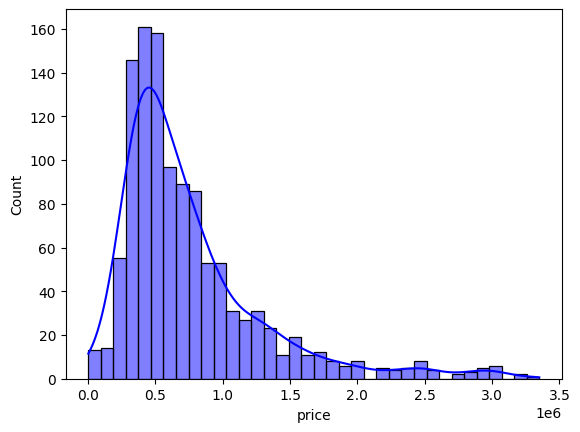

In [166]:
# Creates histogram to see price distribution
sns.histplot(data=df["price"], kde=True, color="blue" )

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

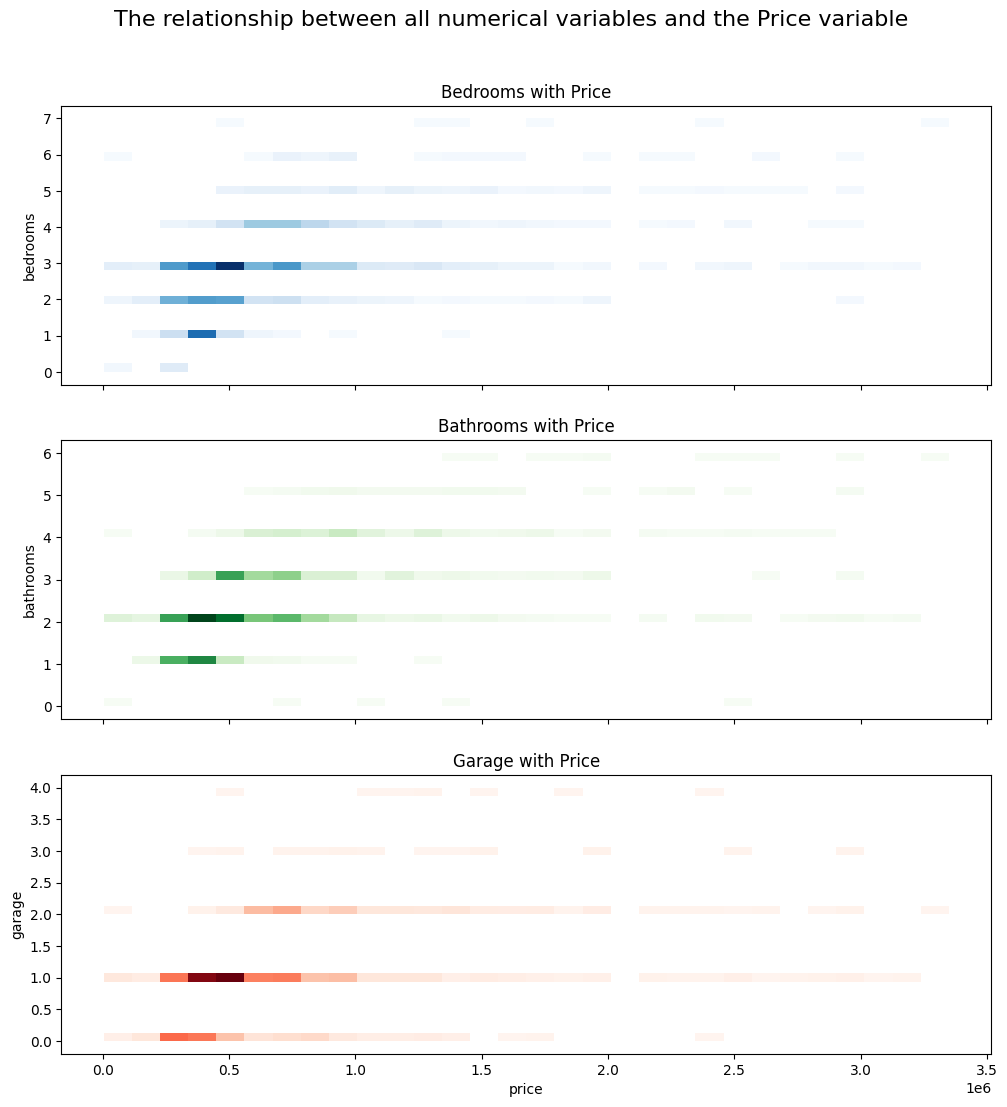

In [170]:
# Create histograms to show the relationships between numerical columns and price
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(12, 12))
plt.subplots_adjust(top=0.90)
fig.suptitle('The relationship between all numerical variables and the Price variable', fontsize=16)

# Bedrooms vs. Price
axes[0].set_title('Bedrooms with Price')
sns.histplot(ax=axes[0], data=df, x="price", y="bedrooms", bins=30, cmap="Blues")

# Bathrooms vs. Price
axes[1].set_title('Bathrooms with Price')
sns.histplot(ax=axes[1], data=df, x="price", y="bathrooms", bins=30, cmap="Greens")

# Garage vs. Price
axes[2].set_title('Garage with Price')
sns.histplot(ax=axes[2], data=df, x="price", y="garage", bins=30, cmap="Reds")

plt.show()

<Axes: >

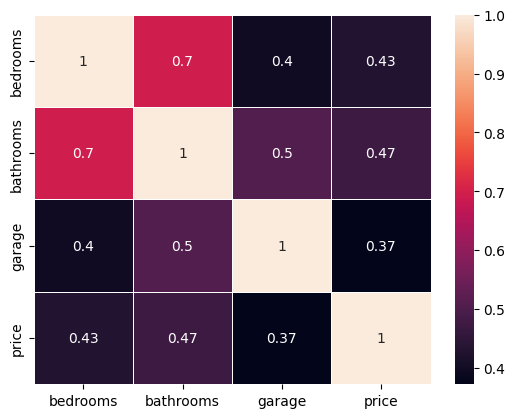

In [171]:
# Correlation Matrix
sns.heatmap(df.corr(numeric_only=True).T, annot=True, linewidths=.5)

# **Label Encoding**

In [172]:
transformed_df=df.copy()
categorical_columns = df.select_dtypes(include="category").columns

le = LabelEncoder()

for i in categorical_columns:
    transformed_df[i]=le.fit_transform(transformed_df[i])

In [173]:
transformed_df.head()

,postalCode,propertyType,style,bedrooms,bathrooms,garage,price
0,2,2,3,3.0,2.0,1.0,2500000.0
1,0,2,3,3.0,2.0,1.0,495000.0
2,2,2,3,3.0,2.0,1.0,365000.0
3,837,0,0,3.0,2.0,1.0,799000.0
5,4,2,3,3.0,2.0,1.0,89000.0


# **Split Dataset**

In [174]:
X = transformed_df.drop(['price'], axis = 1)
y = df['price']

In [175]:
# Split the dataset into train and test sets with 80-20 ratio
X_train, X_test,y_train, y_test =train_test_split(X,y, test_size=0.2)

# **Data Normalization**

In [176]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data using the scaler to make the data between 0 and 1
scaled_training_df = scaler.fit_transform(X_train)

# Transform the test data, we use 'transform' method for scaling paramaters learned on the train data.
scaled_test_df=scaler.transform(X_test)

# **Model Selection**

In [177]:
def select_best_model(models, X, y, cv=10, scoring='neg_mean_squared_error'):
    """
    Selects the best model among a list of models using cross-validation and returns a DataFrame with model names and scores.
    
    Parameters:
    - models (dict): A dictionary of model names as keys and model objects as values.
    - X (array-like): The feature matrix.
    - y (array-like): The target variable.
    - cv (int, optional): Number of cross-validation folds (default is 5).
    - scoring (str, optional): Scoring metric for cross-validation (default is 'neg_mean_squared_error').
    
    Returns:
    - results_df (DataFrame): A DataFrame with two columns - 'Model' and 'RMSE Score'.
    """
    model_names = []
    rmse_scores = []
    
    for model_name, model in models.items():
        # Perform cross-validation
        cv_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        rmse_score = np.mean(np.sqrt(np.abs(cv_scores)))
        
        # Append the model name and its scores to the lists
        model_names.append(model_name)
        rmse_scores.append(rmse_score)
    
    # Create a DataFrame from the lists
    results_df = pd.DataFrame({'Model': model_names, 'RMSE Score': rmse_scores})
    
    return results_df

In [178]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
}

# Call the function to select the best model and get the results DataFrame
results_df = select_best_model(models, X_train, y_train)

print("Model Comparison Results:")
print(results_df)

Model Comparison Results:
                       Model     RMSE Score
0          Linear Regression  472491.812419
1           Ridge Regression  472426.428989
2           Lasso Regression  472491.842624
3                 ElasticNet  481075.961259
4                        SVR  582723.327823
5              Decision Tree  537578.921725
6              Random Forest  445649.639030
7        KNeighborsRegressor  525301.253817
8  GradientBoostingRegressor  422710.924078
9          AdaBoostRegressor  514636.935377


# **Hyper-parameter Optimization**

In [179]:
# Grid Search CV
gb_reg = GradientBoostingRegressor()

# Define the hyperparameters and their possible values to search over
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 100, 200],
    'max_depth': [3, 4, 5], 
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'subsample': [0.5, 0.7, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5)

# Perform the grid search on your data
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE Score:", np.sqrt(-grid_search.best_score_))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 40, 'subsample': 0.7}
Best RMSE Score: 433980.1110229887


In [180]:
selected_model = GradientBoostingRegressor(n_estimators=40, max_depth=3, 
                                           learning_rate=0.1, subsample=0.7)
final_model = selected_model.fit(X_train,y_train)
final_model_pred = final_model.predict(X_test)
print(math.sqrt(mean_squared_error(y_test, final_model_pred)))

332991.62101753376


# **Model Evaluation**

In [181]:
print("Final Model Mean Squared Error", mean_squared_error(y_test, final_model_pred))
print("Final Model Root Mean Squared Error", math.sqrt(mean_squared_error(y_test, final_model_pred)))
print("Final Model Mean Absolute Error", mean_absolute_error(y_test, final_model_pred))
print("Final Model R2 Score", r2_score(y_test, final_model_pred))

Final Model Mean Squared Error 110883419667.88483
Final Model Root Mean Squared Error 332991.62101753376
Final Model Mean Absolute Error 212756.20481885836
Final Model R2 Score 0.4955242727532355
